In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
from google.colab import drive


data_path = '/content/drive/MyDrive/images'
drive.mount('/content/drive')

Mounted at /content/drive


# Load and Preprocess Data

In [ ]:
from PIL import Image
import numpy as np
import os

img_height, img_width = 128, 128

def load_preprocessing_data(data_path):
    images = []
    labels = []
    for genre in os.listdir(data_path):
        genre_path = os.path.join(data_path, genre)
        if not os.path.isdir(genre_path):
            continue  # Skip files in the data_path directory
        for filename in os.listdir(genre_path):
            img_path = os.path.join(genre_path, filename)
            # Print the path to debug
            print(f'Attempting to load image: {img_path}')
            if os.path.exists(img_path):
                try:
                    img = Image.open(img_path).convert('L')
                    img = img.resize((img_height, img_width))  # Corrected resize method
                    img = np.array(img)
                    images.append(img)
                    labels.append(genre)
                except Exception as e:
                    print(f'Error loading image {img_path}: {e}')
            else:
                print(f'File not found: {img_path}')
    images = np.array(images)
    labels = np.array(labels)
    return images, labels


In [ ]:
# Run the function to load and preprocess data
images, labels = load_preprocessing_data(data_path)



Attempting to load image: /content/drive/MyDrive/images/blues/blues00001.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00009.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00003.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00006.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00012.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00004.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00011.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00010.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00000.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00008.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00007.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00002.png
Attempting to load image: /content/drive/MyDrive/images/blues/blues00005.png

In [ ]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
categorical_labels = to_categorical(encoded_labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)

In [ ]:
Norm_X_train = X_train / 255.0
Norm_X_test = X_test / 255.0

In [ ]:
model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 32)      1600      
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 61, 61, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 64)        100416    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 27, 27, 64)        0

# Training the based model

Epoch 1/100
8/8 [==============================] - 8s 201ms/step - loss: 1.1065 - accuracy: 0.3500 - val_loss: 1.0894 - val_accuracy: 0.3833 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 1.1017 - accuracy: 0.3500 - val_loss: 1.0832 - val_accuracy: 0.4500 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0789 - accuracy: 0.4333 - val_loss: 1.0802 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0747 - accuracy: 0.4208 - val_loss: 1.0682 - val_accuracy: 0.4833 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 28ms/step - loss: 1.0553 - accuracy: 0.4458 - val_loss: 1.0404 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0183 - accuracy: 0.5000 - val_loss: 1.0274 - val_accuracy: 0.4833 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 29m

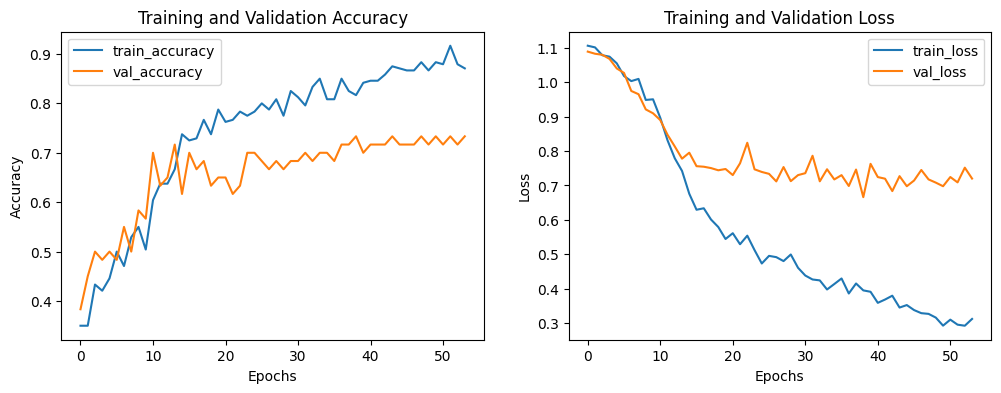

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


## Exploration

# Multiple Filter Sizes:

Training with filter size: (3, 3)
Epoch 1/100
8/8 [==============================] - 4s 186ms/step - loss: 1.1201 - accuracy: 0.3250 - val_loss: 1.0963 - val_accuracy: 0.2833 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 38ms/step - loss: 1.1205 - accuracy: 0.3000 - val_loss: 1.0803 - val_accuracy: 0.3667 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 32ms/step - loss: 1.0940 - accuracy: 0.3625 - val_loss: 1.0775 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 31ms/step - loss: 1.0652 - accuracy: 0.4375 - val_loss: 1.0771 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 28ms/step - loss: 1.0629 - accuracy: 0.4208 - val_loss: 1.0639 - val_accuracy: 0.4667 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0647 - accuracy: 0.4167 - val_loss: 1.0575 - val_accuracy: 0.5833 - lr: 1.0000e-04
Epoch 7/100
8/8 [======

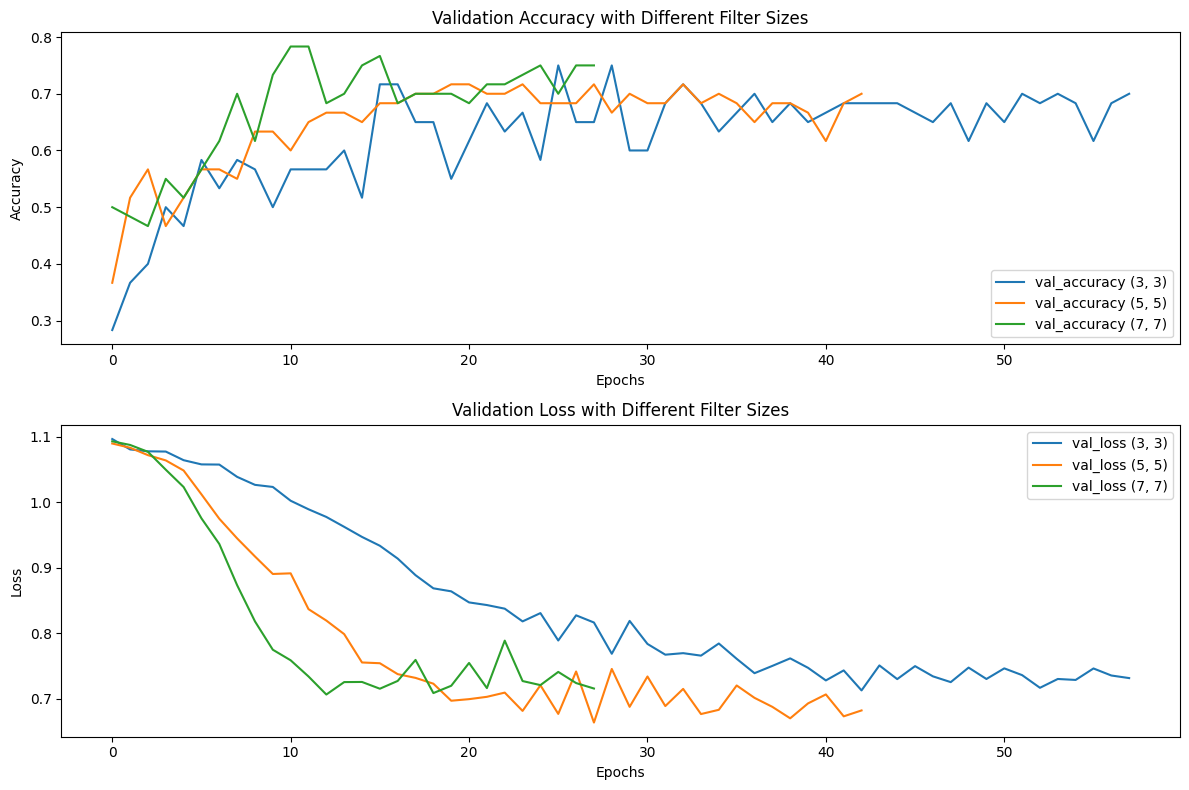

In [ ]:
def create_model(filter_size=(3, 3)):
    model = Sequential([
        Conv2D(32, filter_size, activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, filter_size, activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(128, filter_size, activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(labels)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define filter sizes to experiment with
filter_sizes = [(3, 3), (5, 5), (7, 7)]

# Train and evaluate the model with different filter sizes
histories = {}
for filter_size in filter_sizes:
    print(f'Training with filter size: {filter_size}')
    model = create_model(filter_size)
    history = model.fit(Norm_X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_data=(Norm_X_test, y_test),
                        callbacks=[reduce_lr, early_stopping])
    histories[f'filter_{filter_size}'] = history
    test_loss, test_accuracy = model.evaluate(Norm_X_test, y_test)
    print(f'Test accuracy with filter size {filter_size}: {test_accuracy * 100:.2f}%')

# Plot results for different filter sizes
plt.figure(figsize=(12, 8))
for filter_size in filter_sizes:
    plt.subplot(2, 1, 1)
    plt.plot(histories[f'filter_{filter_size}'].history['val_accuracy'], label=f'val_accuracy {filter_size}')
    plt.subplot(2, 1, 2)
    plt.plot(histories[f'filter_{filter_size}'].history['val_loss'], label=f'val_loss {filter_size}')

plt.subplot(2, 1, 1)
plt.title('Validation Accuracy with Different Filter Sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Validation Loss with Different Filter Sizes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Multiple Initial Learning Rates

Training with learning rate: 0.1
Epoch 1/100
8/8 [==============================] - 2s 63ms/step - loss: 665222.8125 - accuracy: 0.3458 - val_loss: 6.2515 - val_accuracy: 0.3667 - lr: 0.1000
Epoch 2/100
8/8 [==============================] - 0s 32ms/step - loss: 3.0918 - accuracy: 0.3625 - val_loss: 1.1765 - val_accuracy: 0.2667 - lr: 0.1000
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 1.1139 - accuracy: 0.3500 - val_loss: 1.0915 - val_accuracy: 0.3667 - lr: 0.1000
Epoch 4/100
8/8 [==============================] - 0s 28ms/step - loss: 1.1063 - accuracy: 0.3958 - val_loss: 1.0929 - val_accuracy: 0.3667 - lr: 0.1000
Epoch 5/100
8/8 [==============================] - 0s 26ms/step - loss: 1.1132 - accuracy: 0.3083 - val_loss: 1.1200 - val_accuracy: 0.2667 - lr: 0.1000
Epoch 6/100
8/8 [==============================] - 0s 27ms/step - loss: 1.1044 - accuracy: 0.3500 - val_loss: 1.1067 - val_accuracy: 0.2667 - lr: 0.1000
Epoch 7/100
8/8 [===========================

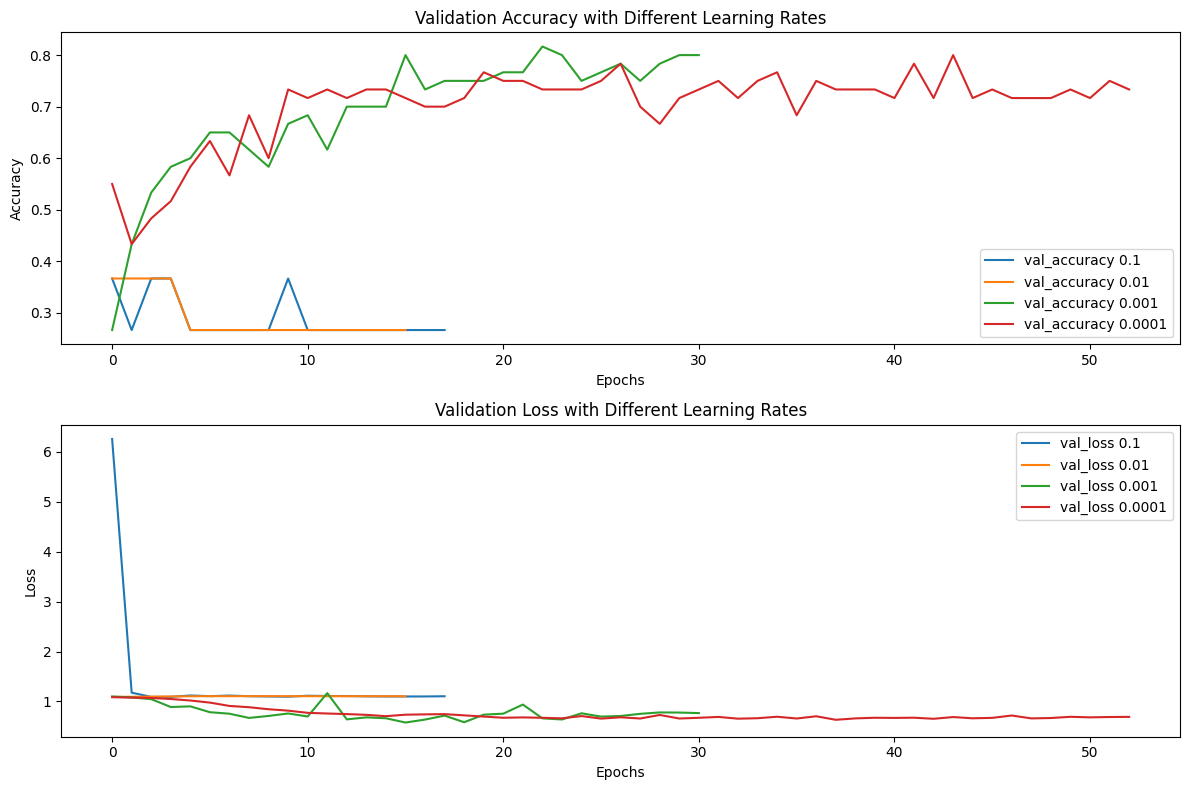

In [ ]:
def create_model_with_lr(initial_lr=0.0001):
    model = Sequential([
        Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (7, 7), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(128, (7, 7), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(len(np.unique(labels)), activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=initial_lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define learning rates to experiment with
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Train and evaluate the model with different learning rates
lr_histories = {}
for lr in learning_rates:
    print(f'Training with learning rate: {lr}')
    model = create_model_with_lr(lr)
    history = model.fit(Norm_X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_data=(Norm_X_test, y_test),
                        callbacks=[reduce_lr, early_stopping])
    lr_histories[f'lr_{lr}'] = history
    test_loss, test_accuracy = model.evaluate(Norm_X_test, y_test)
    print(f'Test accuracy with learning rate {lr}: {test_accuracy * 100:.2f}%')

# Plot results for different learning rates
plt.figure(figsize=(12, 8))
for lr in learning_rates:
    plt.subplot(2, 1, 1)
    plt.plot(lr_histories[f'lr_{lr}'].history['val_accuracy'], label=f'val_accuracy {lr}')
    plt.subplot(2, 1, 2)
    plt.plot(lr_histories[f'lr_{lr}'].history['val_loss'], label=f'val_loss {lr}')

plt.subplot(2, 1, 1)
plt.title('Validation Accuracy with Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('Validation Loss with Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Multiple reduce learning rates paradigms

**factor = 0.1 & patience = 5**

Epoch 1/100
8/8 [==============================] - 2s 61ms/step - loss: 1.1039 - accuracy: 0.3083 - val_loss: 1.1049 - val_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0803 - accuracy: 0.4042 - val_loss: 1.0932 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0669 - accuracy: 0.4292 - val_loss: 1.0735 - val_accuracy: 0.4333 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0685 - accuracy: 0.4042 - val_loss: 1.0700 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0466 - accuracy: 0.4667 - val_loss: 1.0556 - val_accuracy: 0.4667 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 30ms/step - loss: 0.9987 - accuracy: 0.5375 - val_loss: 1.0316 - val_accuracy: 0.5500 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 29ms

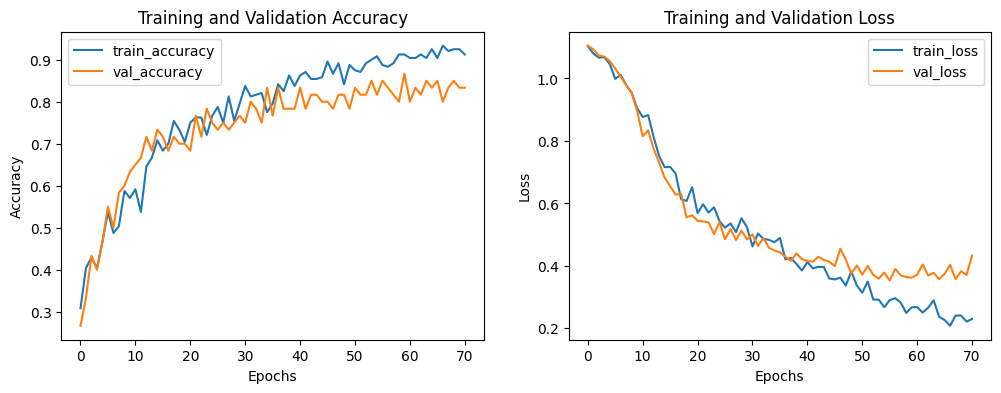

In [20]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

**factor = 0.3 & patience = 10**

Epoch 1/100
8/8 [==============================] - 3s 61ms/step - loss: 1.1024 - accuracy: 0.3875 - val_loss: 1.0974 - val_accuracy: 0.3167 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 32ms/step - loss: 1.1163 - accuracy: 0.3292 - val_loss: 1.0945 - val_accuracy: 0.3667 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0819 - accuracy: 0.4167 - val_loss: 1.0915 - val_accuracy: 0.3667 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0772 - accuracy: 0.4000 - val_loss: 1.0861 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 32ms/step - loss: 1.0566 - accuracy: 0.4458 - val_loss: 1.0793 - val_accuracy: 0.3667 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0427 - accuracy: 0.4375 - val_loss: 1.0518 - val_accuracy: 0.4500 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 30ms

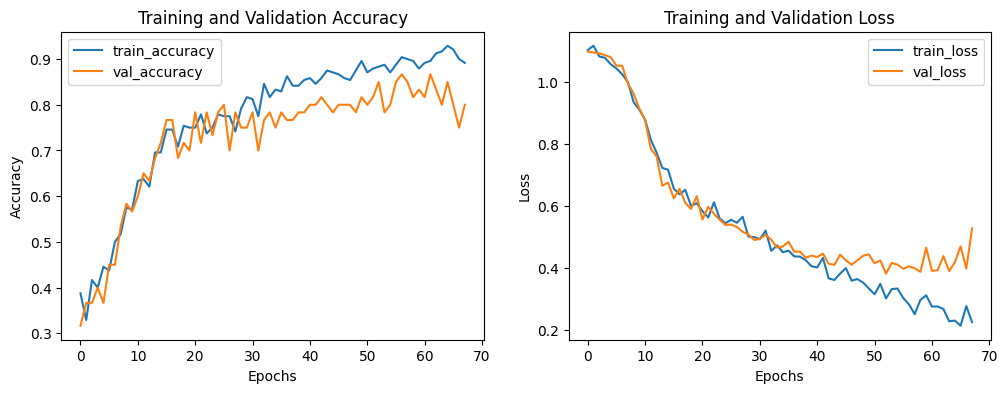

In [21]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

**factor = 0.5 & patience = 15**

Epoch 1/100
8/8 [==============================] - 2s 62ms/step - loss: 1.1029 - accuracy: 0.3417 - val_loss: 1.1001 - val_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0805 - accuracy: 0.3792 - val_loss: 1.0954 - val_accuracy: 0.3167 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0742 - accuracy: 0.4125 - val_loss: 1.0873 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0604 - accuracy: 0.4458 - val_loss: 1.0682 - val_accuracy: 0.5167 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0380 - accuracy: 0.4500 - val_loss: 1.0485 - val_accuracy: 0.5667 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0146 - accuracy: 0.4875 - val_loss: 1.0044 - val_accuracy: 0.6333 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 29ms

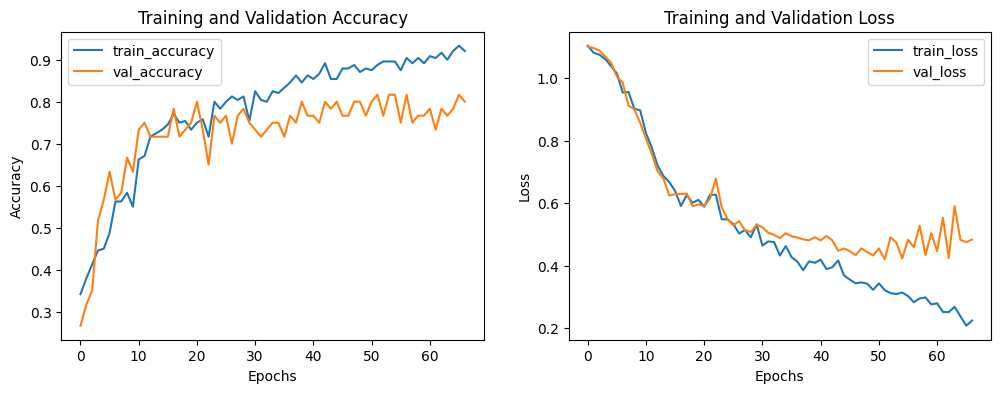

In [22]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Mulitiple stopping criteria


**val_loss & patience = 10**

Epoch 1/100
8/8 [==============================] - 2s 77ms/step - loss: 1.1122 - accuracy: 0.3458 - val_loss: 1.0974 - val_accuracy: 0.2833 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 34ms/step - loss: 1.0974 - accuracy: 0.3583 - val_loss: 1.0952 - val_accuracy: 0.3833 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 32ms/step - loss: 1.0840 - accuracy: 0.4333 - val_loss: 1.0892 - val_accuracy: 0.4833 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 32ms/step - loss: 1.0685 - accuracy: 0.4833 - val_loss: 1.0817 - val_accuracy: 0.4500 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 34ms/step - loss: 1.0515 - accuracy: 0.5333 - val_loss: 1.0619 - val_accuracy: 0.4333 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 33ms/step - loss: 1.0294 - accuracy: 0.5083 - val_loss: 1.0341 - val_accuracy: 0.5167 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 33ms

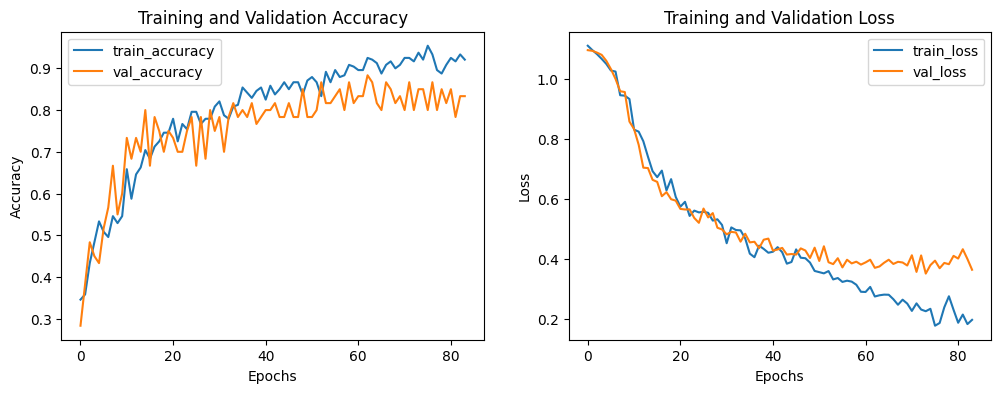

In [23]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

**val_loss & patience = 20**

Epoch 1/100
8/8 [==============================] - 2s 61ms/step - loss: 1.0983 - accuracy: 0.3542 - val_loss: 1.0964 - val_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0836 - accuracy: 0.4000 - val_loss: 1.0902 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0613 - accuracy: 0.4417 - val_loss: 1.0789 - val_accuracy: 0.4333 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0519 - accuracy: 0.4542 - val_loss: 1.0724 - val_accuracy: 0.4500 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0257 - accuracy: 0.4708 - val_loss: 1.0414 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0220 - accuracy: 0.4958 - val_loss: 1.0285 - val_accuracy: 0.5333 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 30ms

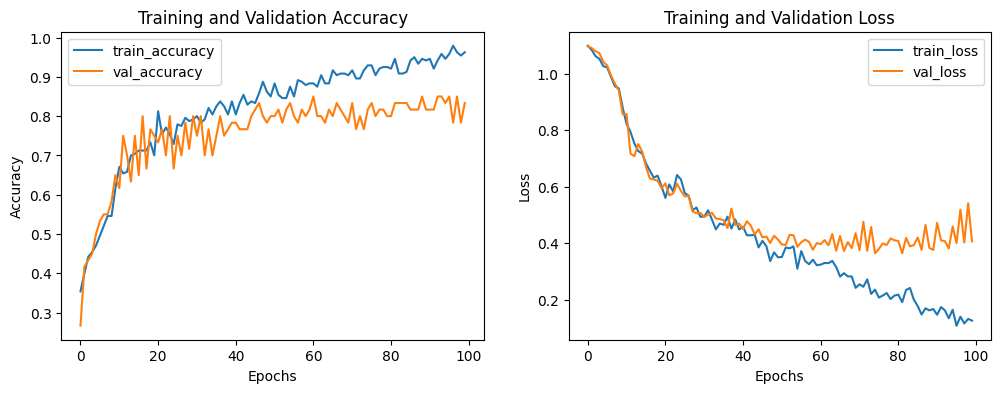

In [24]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

**val_accuracy & patience = 10**

Epoch 1/100
8/8 [==============================] - 2s 63ms/step - loss: 1.0894 - accuracy: 0.3583 - val_loss: 1.0982 - val_accuracy: 0.3000 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0853 - accuracy: 0.4000 - val_loss: 1.0855 - val_accuracy: 0.4333 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0699 - accuracy: 0.4208 - val_loss: 1.0661 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 28ms/step - loss: 1.0591 - accuracy: 0.4417 - val_loss: 1.0652 - val_accuracy: 0.4833 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 31ms/step - loss: 1.0064 - accuracy: 0.5500 - val_loss: 1.0351 - val_accuracy: 0.6000 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0037 - accuracy: 0.5333 - val_loss: 0.9974 - val_accuracy: 0.6167 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 29ms

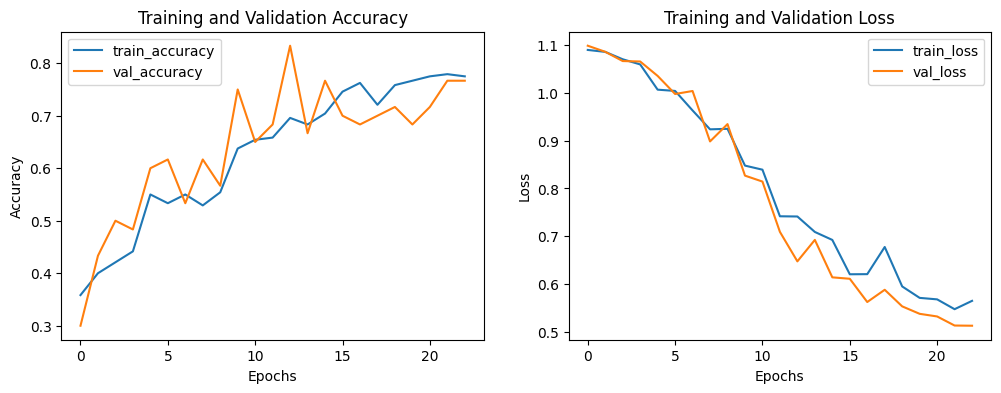

In [25]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

**val_accuracy & patience = 15**

Epoch 1/100
8/8 [==============================] - 2s 63ms/step - loss: 1.1051 - accuracy: 0.3250 - val_loss: 1.1004 - val_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0931 - accuracy: 0.3708 - val_loss: 1.0924 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 28ms/step - loss: 1.0907 - accuracy: 0.3958 - val_loss: 1.0959 - val_accuracy: 0.2833 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0727 - accuracy: 0.4000 - val_loss: 1.0833 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0603 - accuracy: 0.4458 - val_loss: 1.0839 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0358 - accuracy: 0.4583 - val_loss: 1.0495 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 29ms

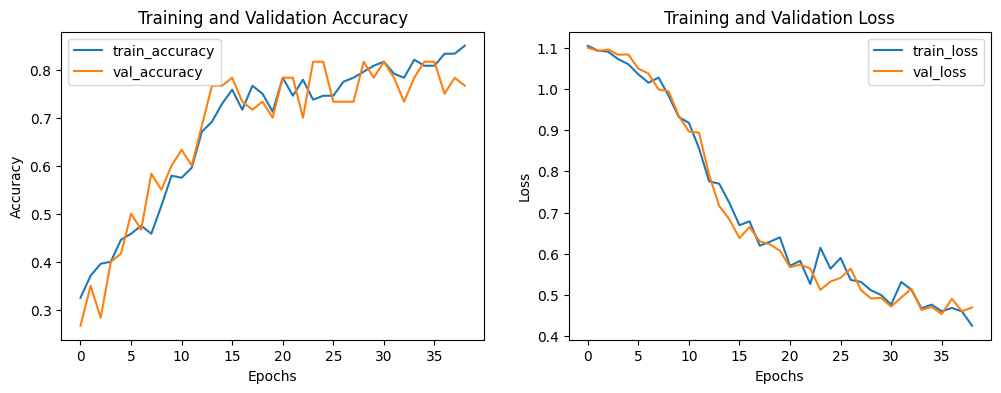

In [26]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

**val_accuracy & patience = 20**

Epoch 1/100
8/8 [==============================] - 3s 62ms/step - loss: 1.1133 - accuracy: 0.3250 - val_loss: 1.1051 - val_accuracy: 0.2667 - lr: 1.0000e-04
Epoch 2/100
8/8 [==============================] - 0s 31ms/step - loss: 1.0823 - accuracy: 0.3833 - val_loss: 1.0933 - val_accuracy: 0.3333 - lr: 1.0000e-04
Epoch 3/100
8/8 [==============================] - 0s 28ms/step - loss: 1.0742 - accuracy: 0.4333 - val_loss: 1.0859 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 4/100
8/8 [==============================] - 0s 30ms/step - loss: 1.0690 - accuracy: 0.4167 - val_loss: 1.0878 - val_accuracy: 0.3500 - lr: 1.0000e-04
Epoch 5/100
8/8 [==============================] - 0s 29ms/step - loss: 1.0609 - accuracy: 0.4500 - val_loss: 1.0675 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 6/100
8/8 [==============================] - 0s 28ms/step - loss: 1.0348 - accuracy: 0.4833 - val_loss: 1.0401 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 7/100
8/8 [==============================] - 0s 31ms

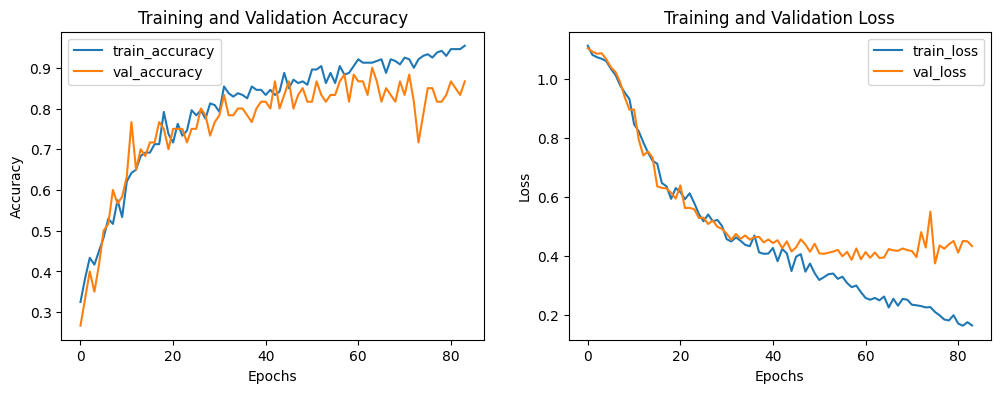

In [27]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

model = Sequential([
  Conv2D(32, (7, 7), activation='relu', input_shape=(img_height, img_width, 1)),  # Update input shape
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(64, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Conv2D(128, (7, 7), activation='relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(len(np.unique(labels)), activation='softmax')
  ])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(Norm_X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(Norm_X_test, y_test),
                    callbacks=[reduce_lr, early_stopping])

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()